In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [13]:
data = scipy.io.loadmat("../data/sampleEEGdata.mat")

cardata = np.zeros(data["EEG"]["data"][0][0].shape)

dataA = data["EEG"]["data"][0][0]
trials = data["EEG"]["data"][0][0].shape[2]
pnts = data["EEG"]["data"][0][0].shape[1]
times = data["EEG"]['times'][0][0][0].reshape(-1,1)

for triali in range(trials):
    for ti in range(pnts):
        cardata[:,ti,triali] = dataA[:,ti,triali] - np.mean(dataA[:,ti,triali])

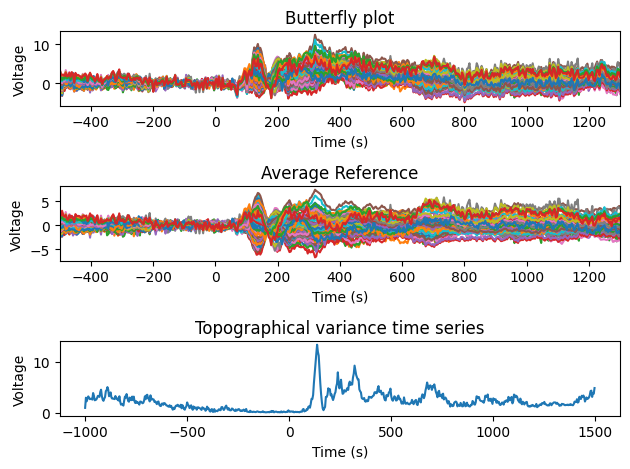

In [22]:
plt.subplot(311)
plt.plot(times,np.mean(dataA, axis=2).T)
plt.xlim([-500,1300])
plt.title("Butterfly plot")
plt.xlabel("Time (s)")
plt.ylabel("Voltage")

plt.subplot(312)
plt.plot(times,np.mean(cardata, axis=2).T)
plt.xlim([-500,1300])
plt.title("Average Reference")
plt.xlabel("Time (s)")
plt.ylabel("Voltage")

var_ts_ER = np.var(np.mean(dataA, axis=2), axis=0)

plt.subplot(313)
plt.plot(times, var_ts_ER)
plt.title("Topographical variance time series")
plt.xlabel("Time (s)")
plt.ylabel("Voltage")

plt.tight_layout()